<div style="border-radius:10px; border:black solid; padding: 15px; background-color:salmon; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:brown; font-size:200%; text-align:center;padding: 0px;"> Medical Insurance Charges Analysis </p></div>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> Business Objective:</font></h3>
   
- Explore how demographic and lifestyle factors relate to medical costs.
- Identify correlations between features like age, BMI, smoking status, and region with medical expenses.
- Use visualizations to highlight key patterns and trends in healthcare spending.

<h3 align="left"><font color=brown> Business Value:</font></h3>

- Provide insights for healthcare providers and insurers to understand cost drivers.
- Help in making data-informed decisions for resource allocation and wellness programs.
- Support policymakers in designing fair and effective healthcare cost-management strategies.
- Determine the annual insurance premium (amount paid every month) offered to the customer.r.

## **Import Needded Liberaries**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.5)
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## **Data Representation**

In [6]:
# Read data
df = pd.read_csv(r'C:\Users\emade\Documents\project_advanced_analysis\medical insurance\medical_insurance.csv')


In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* **Age**: The age of the individual (ranging from 18 to 65 years).
* **Sex**: Gender of the individual (male or female).
* **BMI**: Body Mass Index of the individual, indicating the level of obesity (ranging from 15 to 40).
* **Children**:Number of children covered by health insurance (ranging from 0 to 5)..
* **Smoker**: Smoking status of the individual (yes or no).
* **Region**: Residential area in the US (northeast, northwest, southeast, southwest).
* **Medical Cost**: Annual medical costs incurred by the individual (in USD).



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## **Data Preprocessing**

**Check Duplicated Values**

In [12]:
# Replace 'charges' with 'Medical Cost'
df.columns = [col.capitalize() if col != 'bmi' else 'BMI' for col in df.columns]
df = df.rename(columns={'Charges': 'Medical Cost'})

# Display the updated column names
print(df.columns)


Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Medical Cost'], dtype='object')


In [13]:
df.drop_duplicates()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Check Missing Values**

In [15]:
df.isna().sum()

Age             0
Sex             0
BMI             0
Children        0
Smoker          0
Region          0
Medical Cost    0
dtype: int64

**Check Outliers Values**

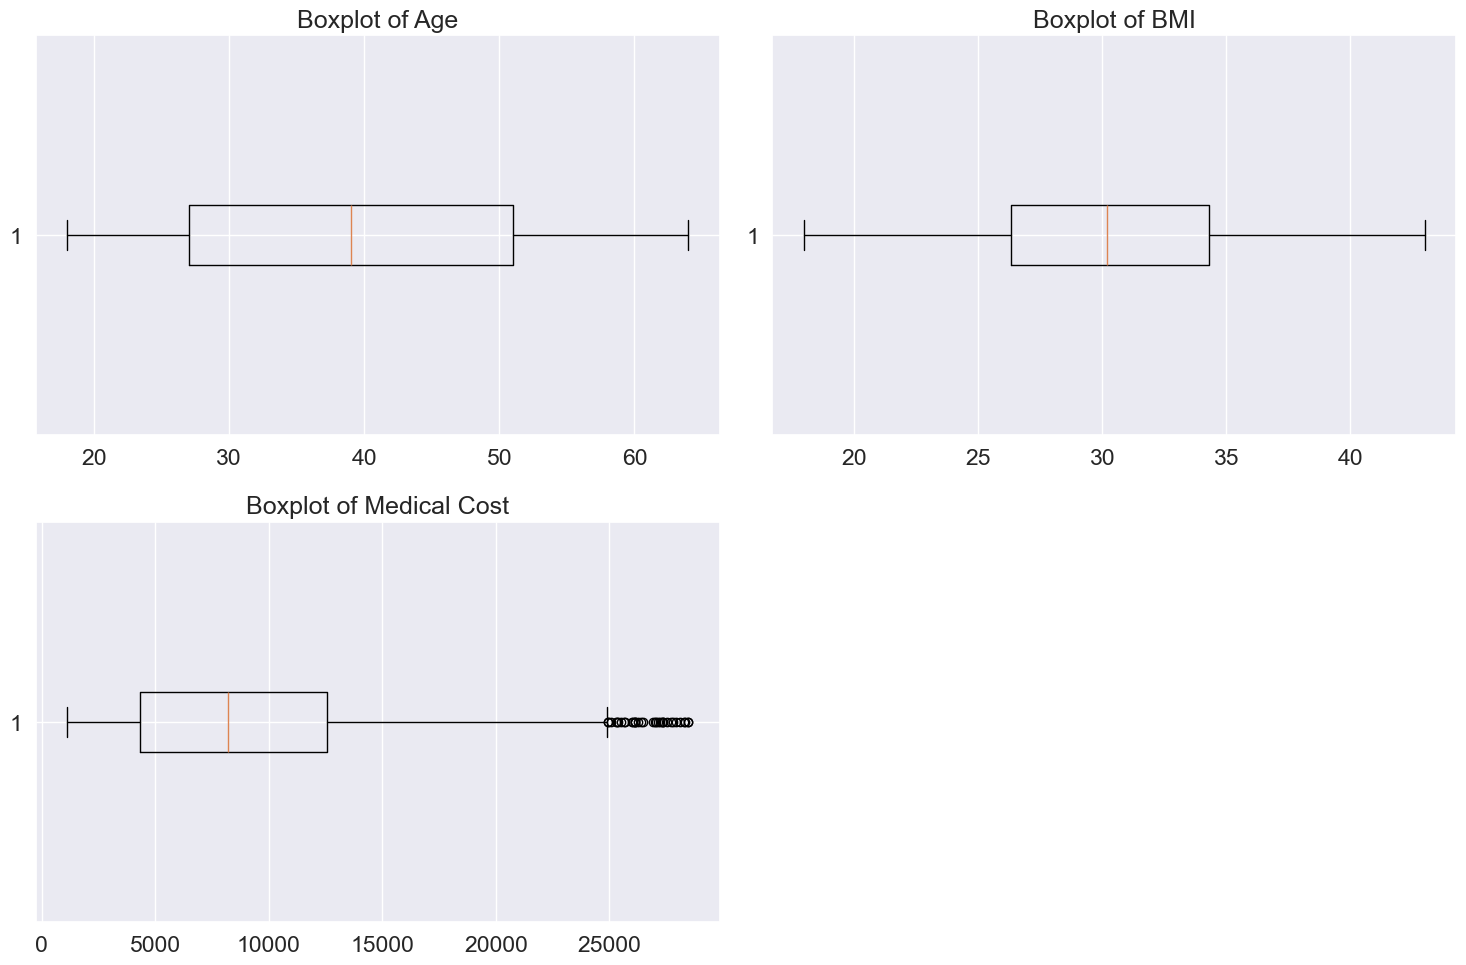

In [17]:
import matplotlib.pyplot as plt

# Define the list of numerical features for outlier detection
numerical_features = ['Age', 'BMI', 'Medical Cost']

# Define a custom multiplier for the IQR (default is 1.5, lower values will reduce outliers)
iqr_multiplier = 1

# Create box plots for each numerical feature to inspect outliers visually
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    # Calculate the IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Apply the custom IQR threshold to filter out outliers
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    filtered_data = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    
    # Create the box plot for the filtered data
    plt.subplot(2, 2, i)
    plt.boxplot(filtered_data[feature], vert=False)
    plt.title(f'Boxplot of {feature}')
    
plt.tight_layout()
plt.show()


- **The BMI and Age distributions are relatively consistent and do not display any significant outliers, which suggests that these features are stable across the dataset.**
- **The presence of a few outliers in the Medical Cost distribution is expected, given that medical costs can vary widely depending on factors like health conditions, insurance coverage, and treatment requirements. However, these outliers are not extreme enough to skew the overall distribution significantly.**

## **Exploratory Data Analysis**

- **The goal of EDA is to investigate the data to understand its structure, patterns, and relationships between features and the target variable (Medical Cost). EDA provides insights that inform further data preprocessing, feature engineering, and model selection processes**

#### **Univariate Analysis**

**Children Column**

In [23]:
df['Children'].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: Children, dtype: float64

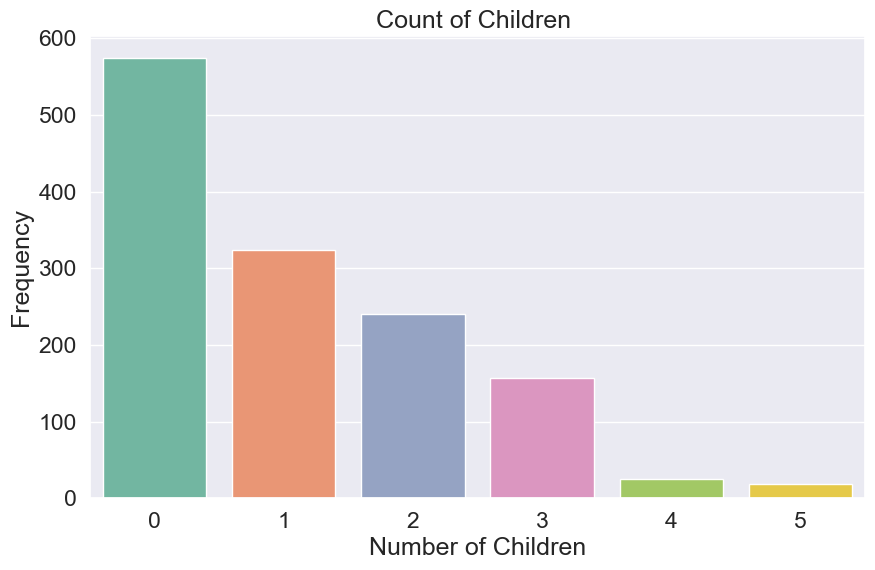

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Children', data=df, palette='Set2')
plt.title("Count of Children ")
plt.xlabel("Number of Children")
plt.ylabel("Frequency")
plt.show()


- **This suggests that the number of children in the dataset is not evenly distributed across the population, and there might be a concentration of individuals with a 0 number of children. This non-uniform distribution should be considered when performing further analysis, as it could influence the interpretation of correlations and trends within the dataset.**

**Region Column**

In [27]:
df["Region"].value_counts()

Region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

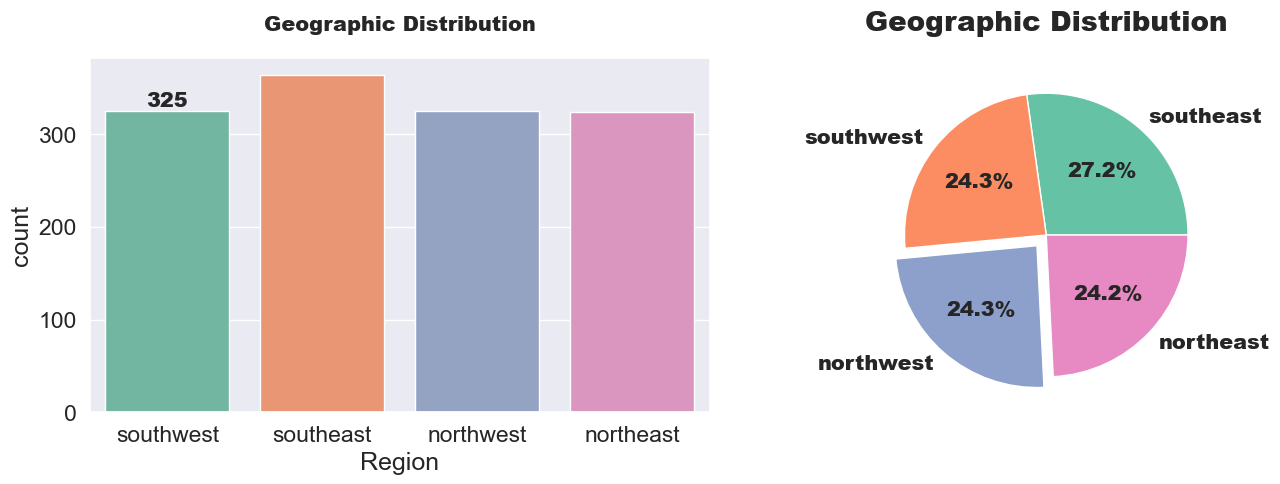

In [28]:
# Count the number of occurrences for each region
count = df["Region"].value_counts()

# Create a figure with two subplots
plt.figure(figsize=(14, 9))

# Count Plot for Region
plt.subplot(2, 2, 1)
ax = sns.countplot(data=df, x="Region", palette="Set2")
ax.bar_label(ax.containers[0], fontweight="black", size=15)
plt.title("Geographic Distribution", fontweight="black", size=15, pad=20)

# Pie Chart for Region Distribution
plt.subplot(2, 2, 2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",
        colors=sns.color_palette("Set2"),
        textprops={"fontweight": "black", "fontsize": 15},
        explode=[0, 0, 0.1, 0])
plt.title("Geographic Distribution", fontweight="black", size=20, pad=20)

# Show the plots
plt.tight_layout()
plt.show()


- **Region column shows also an uniform distribution with balanced number of different region.**

**Sex Column**

In [31]:
df["Sex"].value_counts()

Sex
male      676
female    662
Name: count, dtype: int64

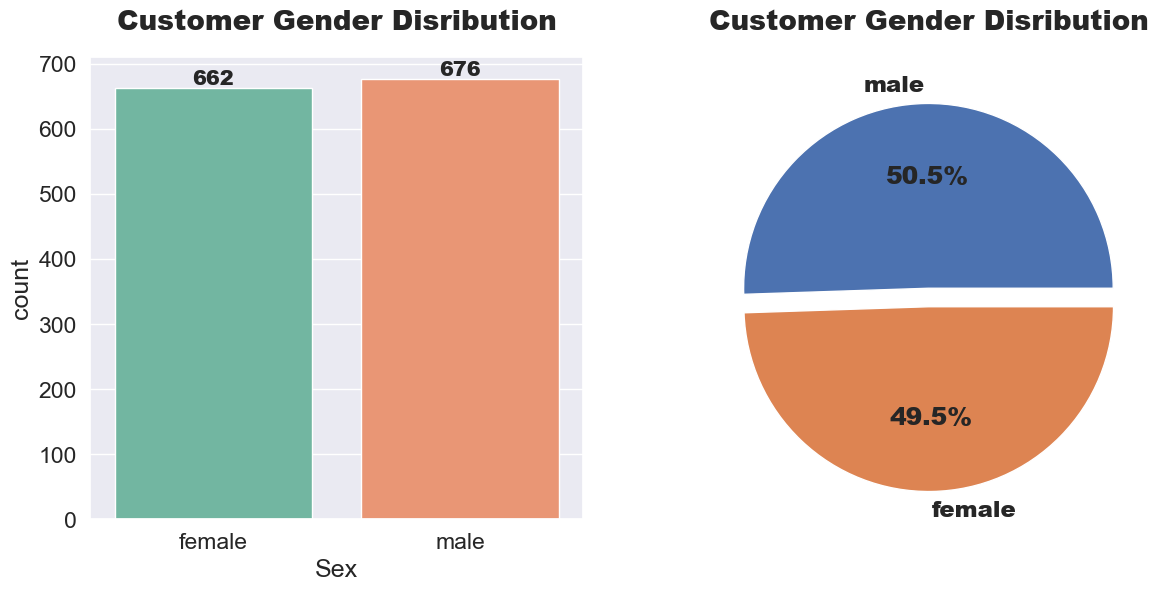

In [32]:
count = df["Sex"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="Sex",palette="Set2")
ax.bar_label(ax.containers[1],fontweight="black",size=15)
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0, 0.1])
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)
plt.show()

- **Sex column shows balanced numbers of each gender.**

**Age Column**

In [35]:
df['Age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: Age, dtype: float64

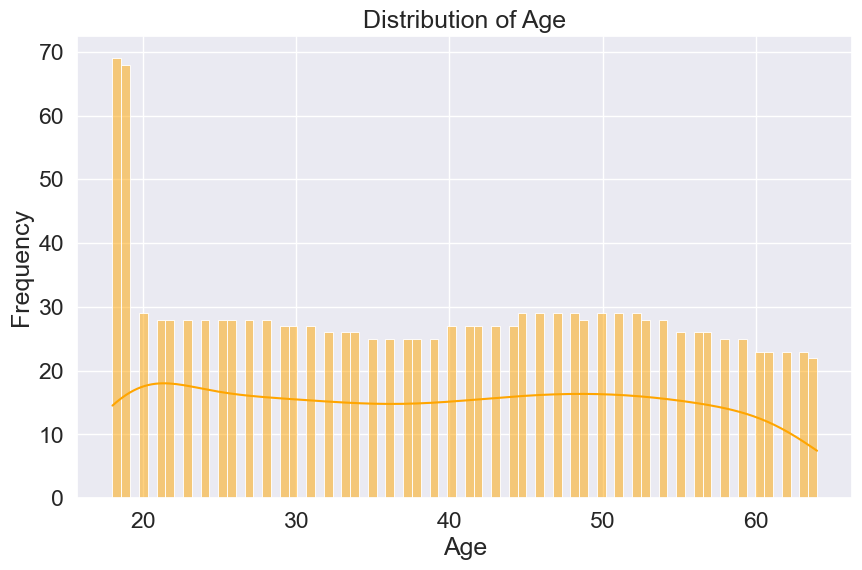

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=80, kde=True, color='orange')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


- **When visualizing the age distribution using 80 bins, the data appears to be uniformly distributed across the age range. However, there is a slight increase in the number of individuals in the lower age range. While this trend is noticeable, it doesn't indicate a significant concentration of outliers. The slight increase is not extreme enough to be considered outliers, and the overall distribution remains relatively even across different age groups. This suggests that the dataset includes a balanced representation of ages, with no major skew towards any particular age group.**

**Smoker Column**

In [39]:
df['Smoker'].value_counts()

Smoker
no     1064
yes     274
Name: count, dtype: int64

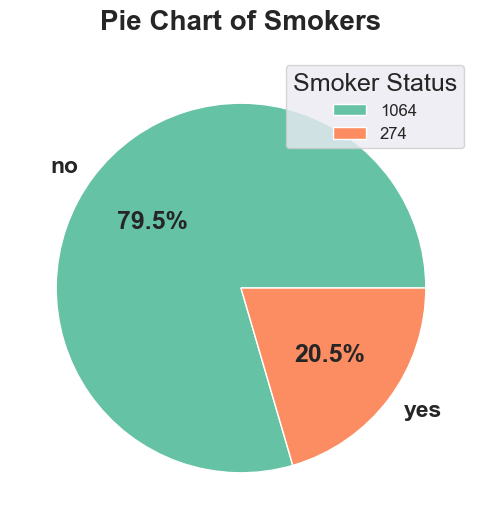

In [40]:
plt.figure(figsize=(12, 6))

# Count the occurrences of each category in the 'Smoker' column
smoker_counts = df['Smoker'].value_counts()

# Create the pie chart
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"),
        textprops={'fontweight': 'bold'})

plt.title('Pie Chart of Smokers', fontweight='bold', size=20, pad=20)
plt.legend(smoker_counts, title="Smoker Status", loc="upper right", fontsize=12)
plt.show()


- **Such an uneven distribution may lead to biased insights if the effect of smoking on other variables, like medical costs, is being analyzed.**

**BMI Column**

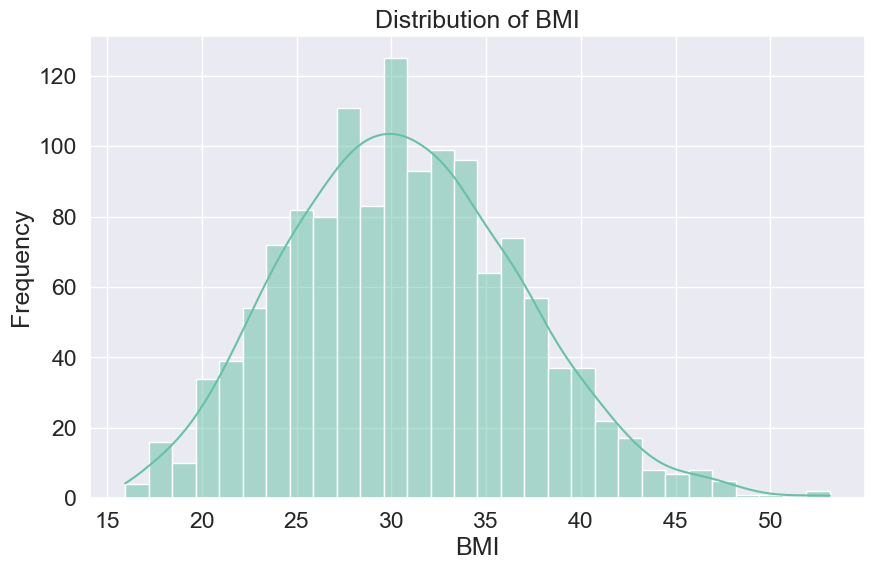

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

- **The BMI column follows a normal distribution, indicating that the data is symmetrically distributed around the mean. This suggests that BMI values are generally centered around an average range, with fewer extreme values.**
- **For further analysis, BMI will be transformed into four categories: 'underweight', 'normal', 'overweight', and 'obesity'. This categorization will help simplify the interpretation and provide more meaningful insights into how BMI influences other factors like medical costs, without focusing on continuous BMI values.**

**Medical Cost**

In [46]:
df['Medical Cost'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: Medical Cost, dtype: float64

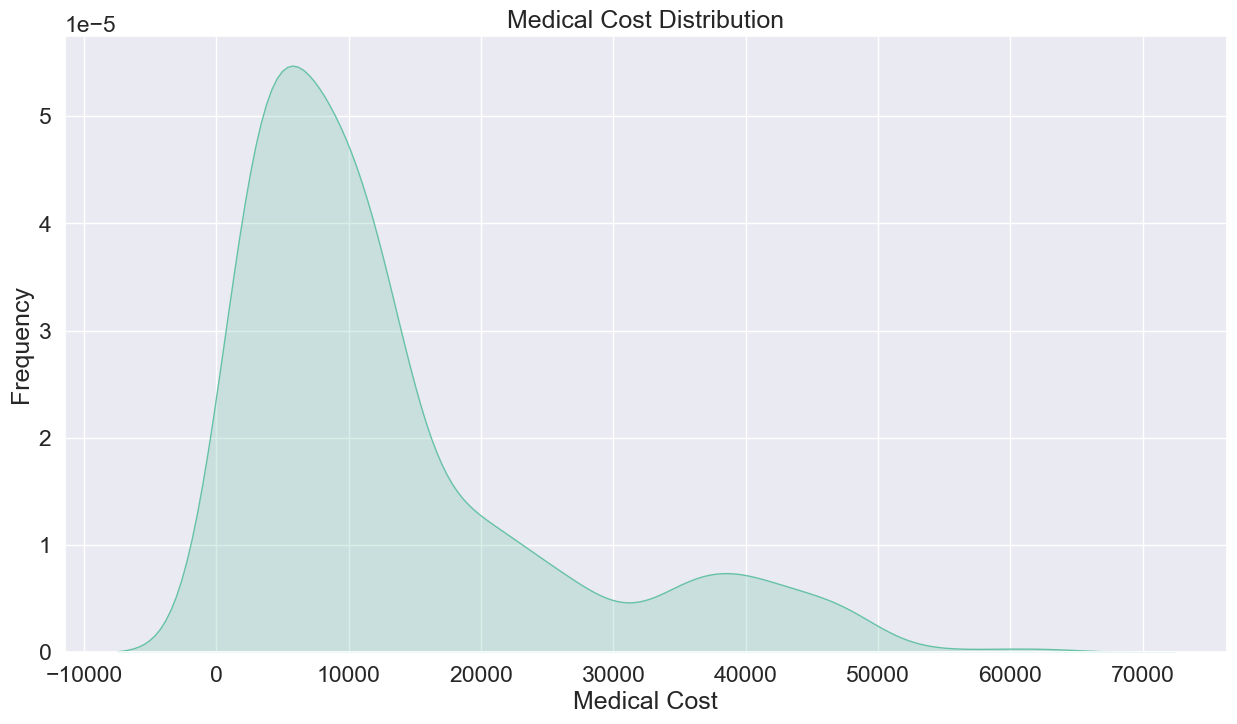

In [47]:
plt.figure(figsize=(15, 8))

sns.kdeplot(df['Medical Cost'], fill=True, palette="Set2")
plt.title('Medical Cost Distribution')
plt.xlabel('Medical Cost')
plt.ylabel('Frequency')

plt.show()

- **The Medical Cost distribution shows a slight skew towards higher values, which is expected given the variability in medical expenses due to factors such as health conditions, insurance coverage, and treatment requirements. While there are a few higher-cost values, they are not extremely distorting the overall distribution.**

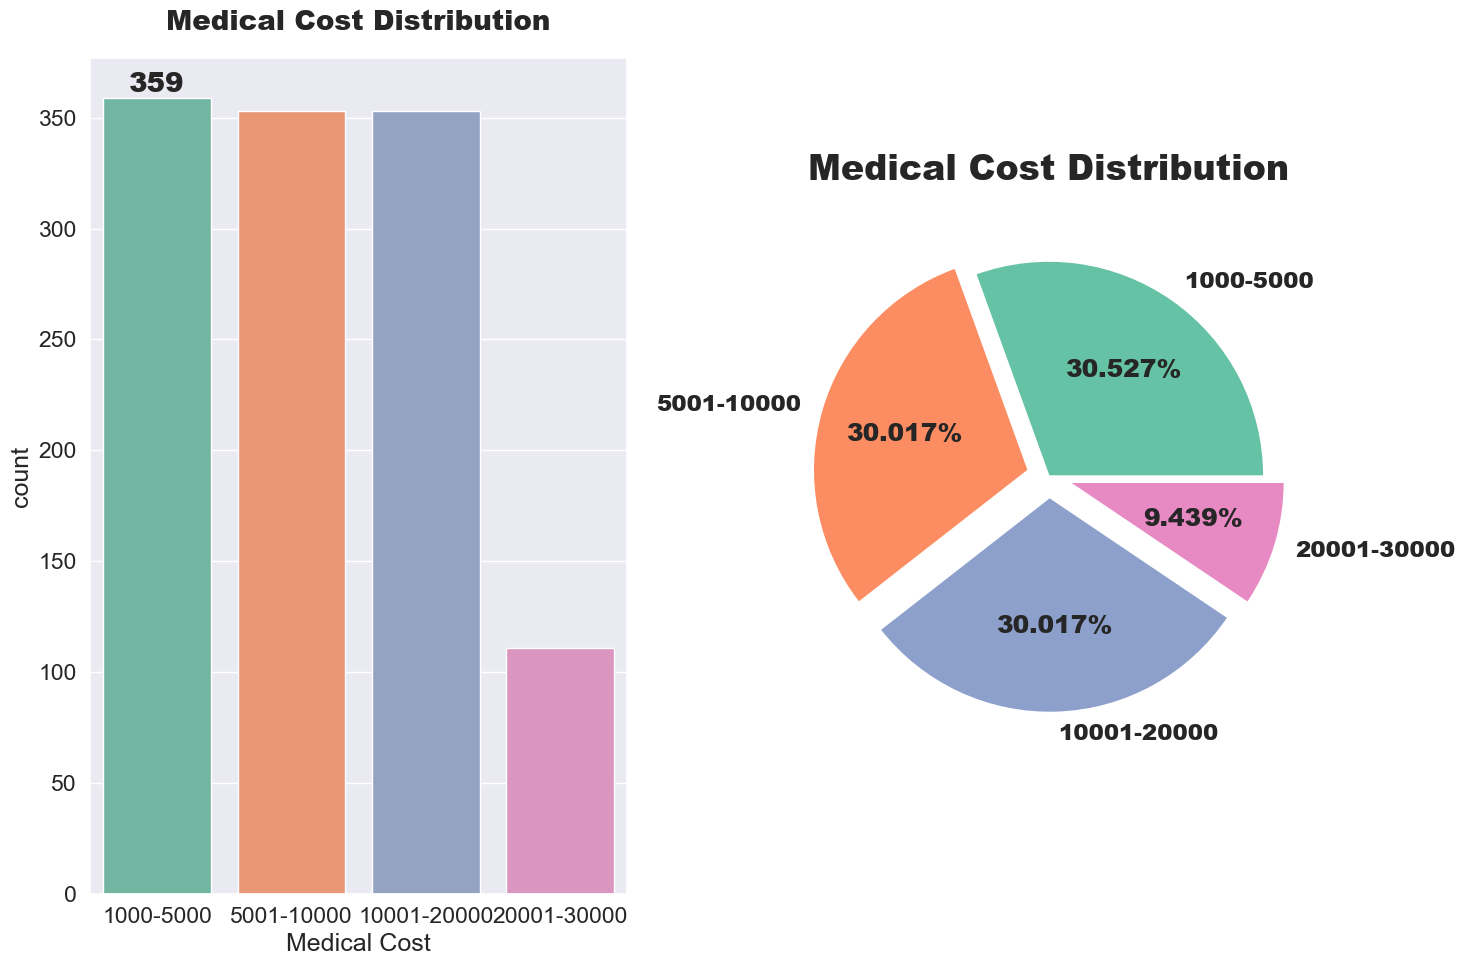

In [49]:
# Example: Binning the Medical Cost into categories without modifying the main DataFrame
bins = [1000, 5000, 10000, 20000, 30000]
labels = ['1000-5000', '5001-10000', '10001-20000', '20001-30000']
medical_cost_category = pd.cut(df['Medical Cost'], bins=bins, labels=labels)

# Count the number of occurrences for each category
count = medical_cost_category.value_counts()

# Create a figure with two subplots
plt.figure(figsize=(15, 10))

# Count Plot for Medical Cost Category
plt.subplot(1, 2, 1)
ax = sns.countplot(x=medical_cost_category, palette='Set2')
ax.bar_label(ax.containers[0], fontweight='black', size=20)
plt.title("Medical Cost Distribution", fontweight='black', size=20, pad=20)

# Pie Chart for Medical Cost Distribution
plt.subplot(1, 2, 2)
plt.pie(count.values, labels=count.index, autopct="%.3f%%", 
        colors=sns.color_palette("Set2"),
        textprops={"fontweight": "black"}, explode=[0] + [0.1] * (len(count) - 1))
plt.title("Medical Cost Distribution", fontweight='black', size=25, pad=20)

# Show the plots
plt.tight_layout()
plt.show()


## **Data Transformation**

In [51]:
# categorizing the BMI values as underweight, normal, overweight, and obesity.
df.sort_values(by='BMI',ascending=True).reset_index(drop=True,inplace=True)

conditions = [
    (df['BMI']<18.5),                       #underweight
    (df['BMI']>=18.5) & (df['BMI']<=25),    #normal
    (df['BMI']>25) & (df['BMI']<=29.9),     #overweight 
    (df['BMI']>29.9)]                       #obesity 

categories = ['underweight','normal','overweight','obese']

df['bmi_category'] = np.select(conditions,categories,default='unknown')

# Filter rows where Medical Cost is greater than or equal to 12000 and overwrite the original DataFrame
# df = df[df['Medical Cost'] <= 12000]

df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [52]:
df['bmi_category'].value_counts().to_frame().reset_index()

,bmi_category,count
0,obese,716
1,overweight,375
2,normal,227
3,underweight,20


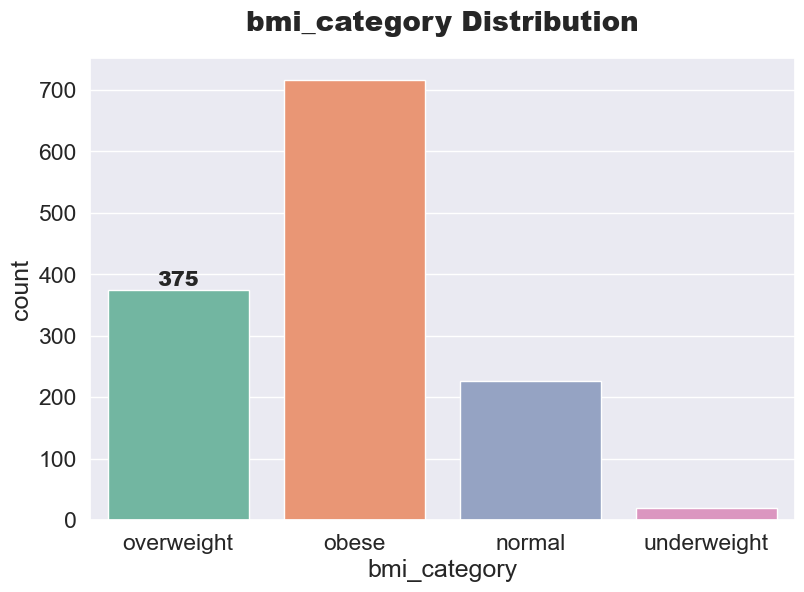

In [53]:
count = df["bmi_category"].value_counts()

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=df, x="bmi_category",palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("bmi_category Distribution",fontweight="black",size=20,pad=20)

plt.show()

- **Unfortunately, there is limited data for the underweight category, which makes it challenging to analyze its impact on health insurance costs. However, it is promising to see a significant amount of data in the overweight and obese categories. This provides a good opportunity to explore the relationship between these BMI categories and medical costs in further analysis, potentially highlighting how higher BMI values are associated with increased healthcare expenses.**

In [55]:
# Define mappings for each categorical column
region_mapping = {'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4}
sex_mapping = {'male': 1, 'female': 0}
smoker_mapping = {'yes': 1, 'no': 0}
bmi_category_mapping = {'underweight': 1, 'normal': 2, 'overweight': 3, 'obese': 4}

# Apply mappings in place, directly overwriting the original columns
df['Region'] = df['Region'].map(region_mapping)
df['Sex'] = df['Sex'].map(sex_mapping)
df['Smoker'] = df['Smoker'].map(smoker_mapping)
df['bmi_category'] = df['bmi_category'].map(bmi_category_mapping)

# Now 'Region', 'Sex', and 'Smoker' columns contain the encoded values
print(df.head())  # To confirm the transformation


   Age  Sex     BMI  Children  Smoker  Region  Medical Cost  bmi_category
0   19    0  27.900         0       1       1   16884.92400             3
1   18    1  33.770         1       0       2    1725.55230             4
2   28    1  33.000         3       0       2    4449.46200             4
3   33    1  22.705         0       0       3   21984.47061             2
4   32    1  28.880         0       0       3    3866.85520             3


#### **Bivariate Analysis**

**Numerical Features vs. Medical Cost**

In [103]:
# Group by 'Region' and sum the 'charges' (Medical Cost) for each region
region_charges_sum = df.groupby('Region')['Medical Cost'].sum()

# Calculate the total charges (Medical Cost) across all regions
total_charges = df['Medical Cost'].sum()

# Calculate the percentage of total charges for each region
region_percentage = (region_charges_sum / total_charges) * 100

# Display the results
print(region_percentage)


Region
1    22.599652
2    30.208057
3    22.728947
4    24.463344
Name: Medical Cost, dtype: float64


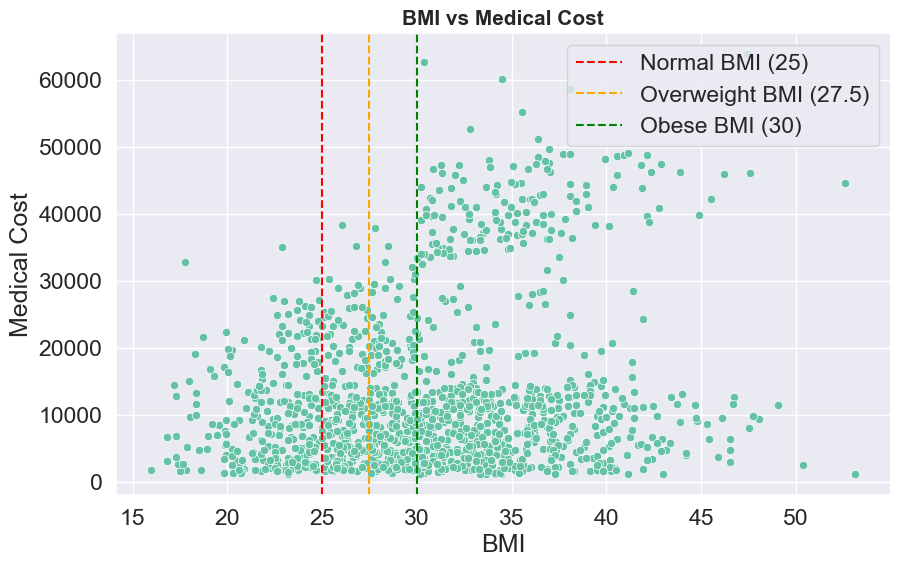

In [59]:
# Scatter plot for BMI vs Medical Cost with vertical lines for Normal, Overweight, and Obese BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='Medical Cost', palette='Set2')

# Add vertical lines
plt.axvline(x=25, color='red', linestyle='--', linewidth=1.5, label='Normal BMI (25)')
plt.axvline(x=27.5, color='orange', linestyle='--', linewidth=1.5, label='Overweight BMI (27.5)')
plt.axvline(x=30, color='green', linestyle='--', linewidth=1.5, label='Obese BMI (30)')

# Add titles and labels
plt.title("BMI vs Medical Cost", fontweight='bold', size=15)
plt.xlabel('BMI')
plt.ylabel('Medical Cost')

# Add legend
plt.legend()

# Show the plot
plt.show()


- ***The bivariate analysis reveals a clear trend: as BMI increases, medical costs tend to rise as well. The relationship appears to become more pronounced, especially in the BMI range between 25 and 30, where the intensity of the increase in costs is notably higher. This suggests that individuals with a BMI in the overweight range may incur significantly higher medical costs, which could be related to increased health risks associated with higher BMI levels**

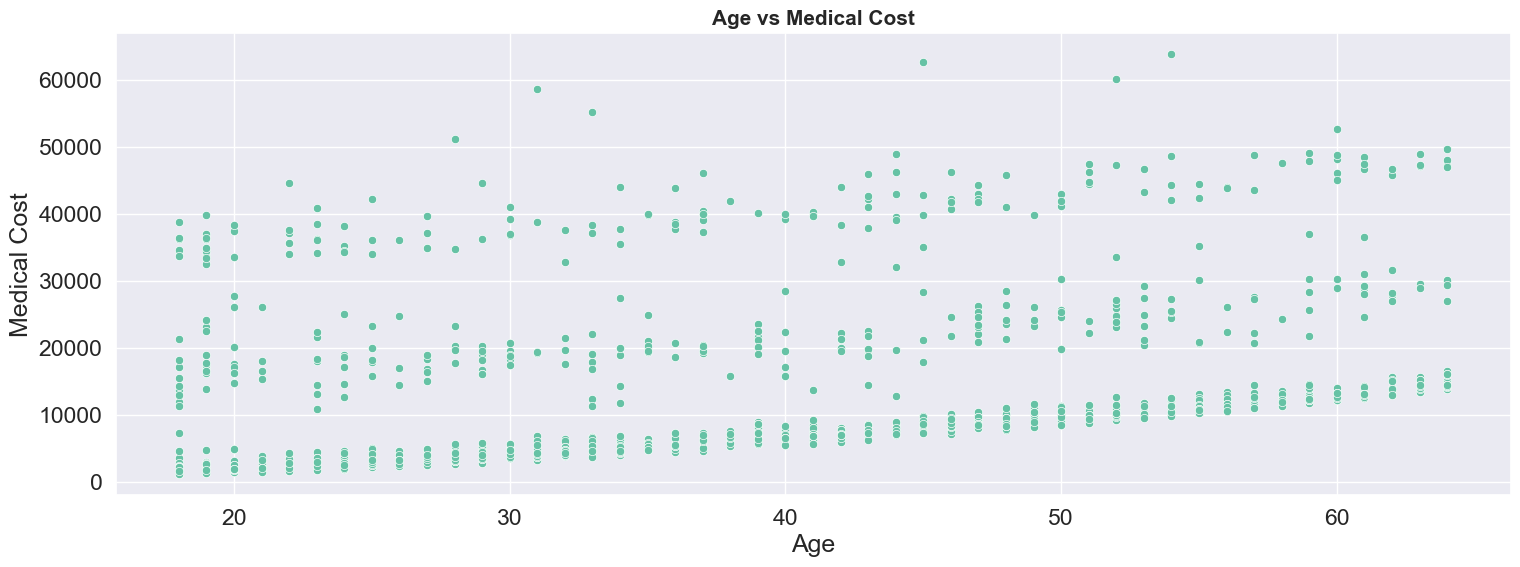

In [61]:
# List of numerical features to plot against Medical Cost
numerical_features = ['Age', 'BMI', 'Children']

# Create subplots for scatter plots with adjusted figsize
fig, axes = plt.subplots(1, 1, figsize=(18, 6))  # Reduced size for better rendering

# Scatter plot for Age vs Medical Cost
sns.scatterplot(data=df, x='Age', y='Medical Cost', palette='Set2')
plt.title("Age vs Medical Cost", fontweight='bold', size=15)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Show the scatter plots
plt.show()


**Categorical Features vs. Medical Cost**

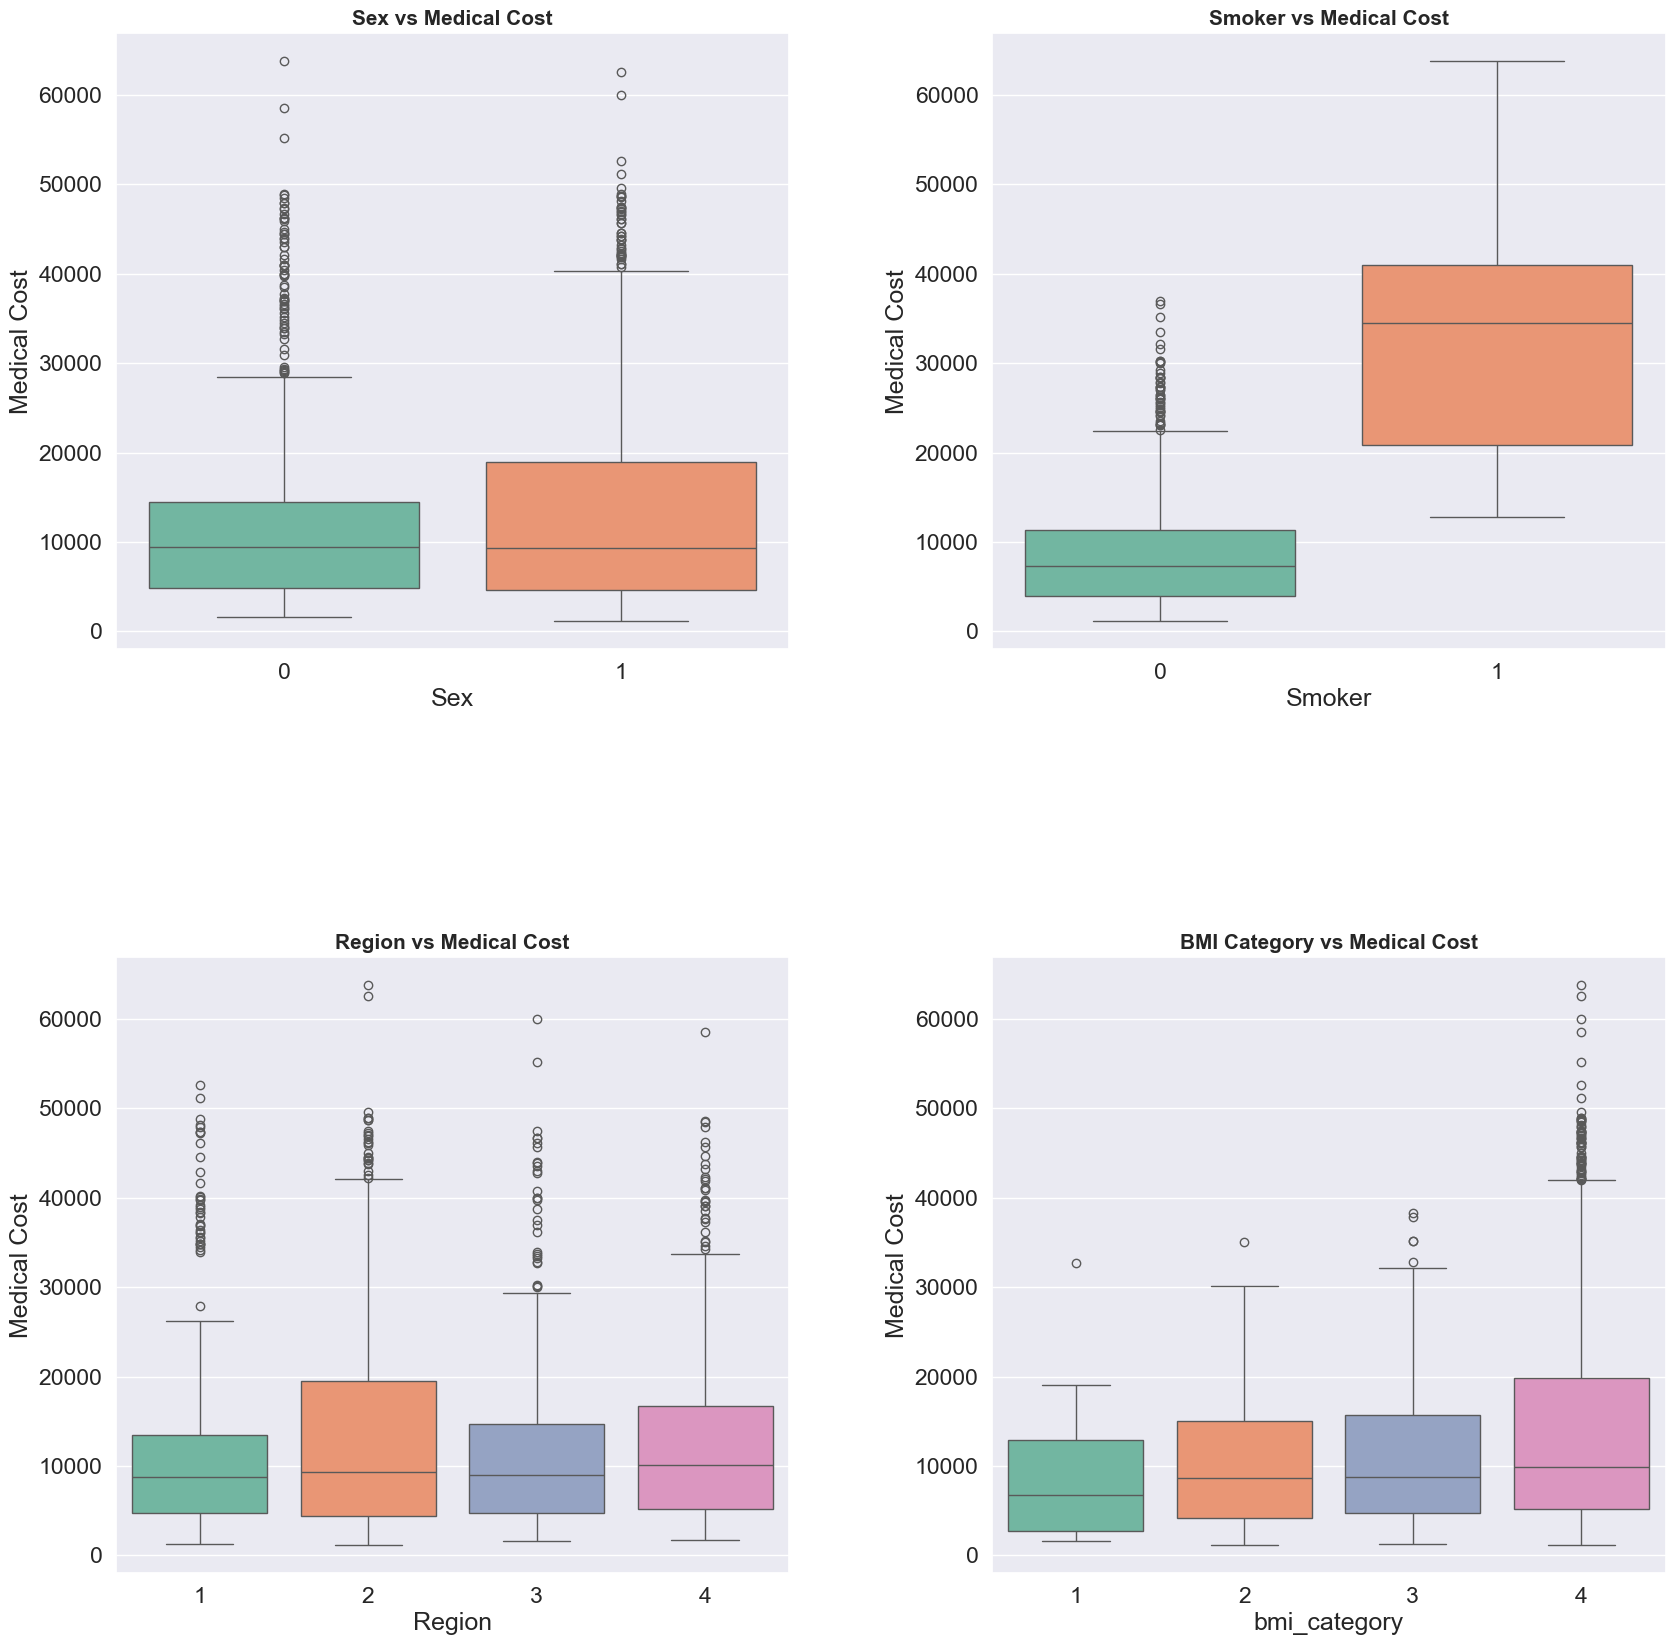

In [63]:
# Create a 2x2 grid for subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Boxplot for Sex vs Medical Cost
sns.boxplot(data=df, x='Sex', y='Medical Cost', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title("Sex vs Medical Cost", fontweight='bold', size=15)

# Boxplot for Smoker vs Medical Cost
sns.boxplot(data=df, x='Smoker', y='Medical Cost', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title("Smoker vs Medical Cost", fontweight='bold', size=15)

# Boxplot for Region vs Medical Cost
sns.boxplot(data=df, x='Region', y='Medical Cost', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title("Region vs Medical Cost", fontweight='bold', size=15)

# Boxplot for bmi_category vs Medical Cost
sns.boxplot(data=df, x='bmi_category', y='Medical Cost', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title("BMI Category vs Medical Cost", fontweight='bold', size=15)

# Show the plots
plt.show()


**Multivariate Analysis**

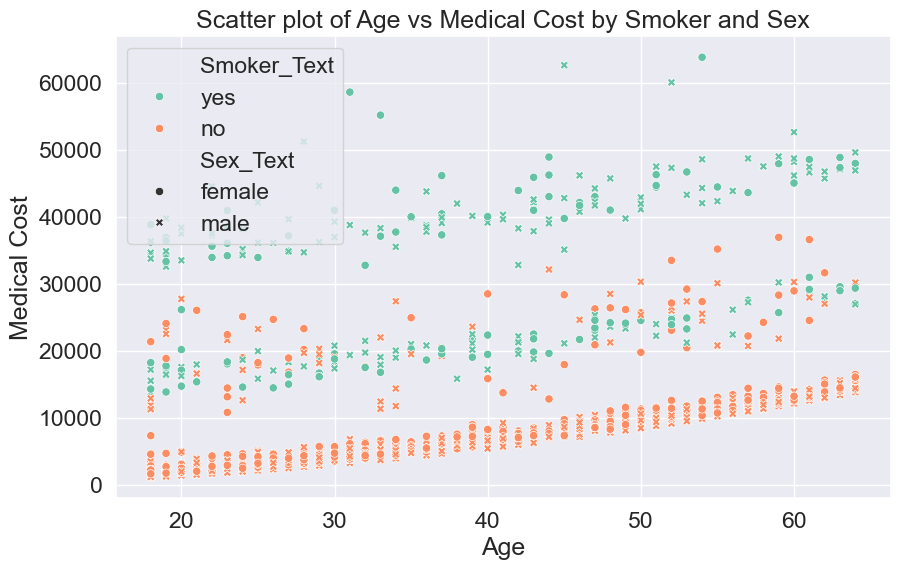

In [65]:
# Replace the numerical values in the 'Smoker' and 'Sex' columns with the original text
df['Smoker_Text'] = df['Smoker'].replace({1: 'yes', 0: 'no'})
df['Sex_Text'] = df['Sex'].replace({1: 'male', 0: 'female'})

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Medical Cost', hue='Smoker_Text', style='Sex_Text')
plt.xlabel('Age')
plt.ylabel('Medical Cost')
plt.title('Scatter plot of Age vs Medical Cost by Smoker and Sex')
plt.show()

# Drop the temporary columns if they are no longer needed
df.drop(['Smoker_Text', 'Sex_Text'], axis=1, inplace=True)


- **In the analysis between charges, age, and smoker, it is evident that as age increases, medical costs also tend to rise. Additionally, smokers exhibit significantly higher medical charges compared to non-smokers, which may be attributed to the increased health risks and healthcare needs associated with smoking. This highlights the compounded effect of age and smoking on medical costs.**

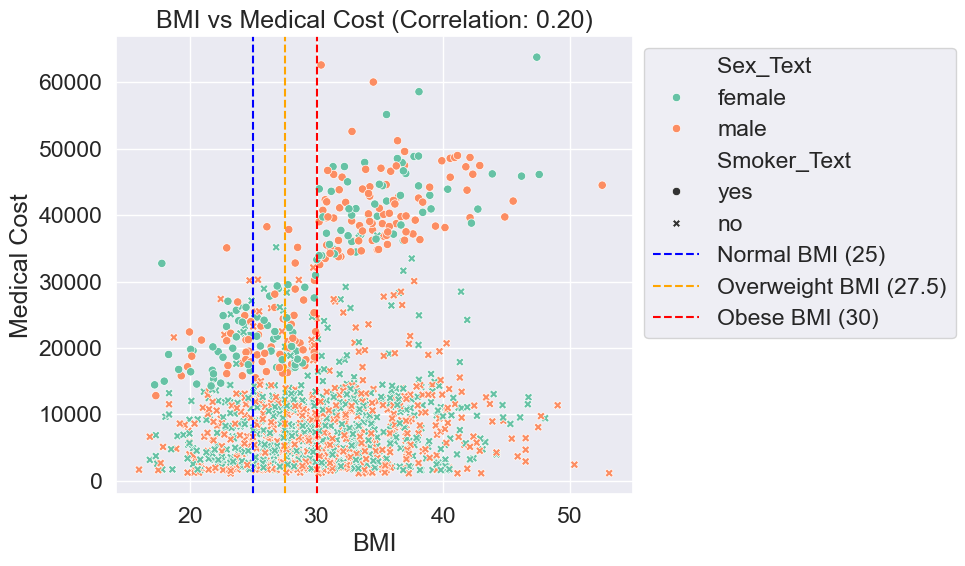

In [67]:
df['Sex_Text'] = df['Sex'].replace({1: 'male', 0: 'female'})
df['Smoker_Text'] = df['Smoker'].replace({1: 'yes', 0: 'no'})

# Calculate correlation
correlation1 = df['BMI'].corr(df['Medical Cost'])

# Create scatter plot with original text labels in the legend
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Medical Cost', hue='Sex_Text', style='Smoker_Text', data=df)

# Add vertical lines for BMI categories
plt.axvline(x=25, color='blue', linestyle='--', label='Normal BMI (25)')
plt.axvline(x=27.5, color='orange', linestyle='--', label='Overweight BMI (27.5)')
plt.axvline(x=30, color='red', linestyle='--', label='Obese BMI (30)')

# Title and labels
plt.title(f"BMI vs Medical Cost (Correlation: {correlation1:.2f})")
plt.xlabel('BMI')
plt.ylabel('Medical Cost')

# Adjust the legend position to avoid overlap with the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

# Drop the temporary columns if they are no longer needed
df.drop(['Sex_Text', 'Smoker_Text'], axis=1, inplace=True)


- **The analysis between charges, BMI, and smoker yields similar insights to the previous comment. As BMI increases, so do the medical costs, particularly for smokers, who show higher charges across various BMI categories. This further emphasizes the influence of both BMI and smoking on health-related expenses, suggesting that individuals with higher BMI values and those who smoke may face significantly higher healthcare costs.**

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Key Takeaways:</font></h3>
    
**Medical Costs and Age:**
- As age increases, medical costs tend to rise. Older individuals generally face higher healthcare expenses, reflecting the greater healthcare needs associated with aging.

**Medical Costs and Smoking:**
- Smokers exhibit significantly higher medical costs compared to non-smokers, suggesting that smoking contributes to increased health risks and higher healthcare expenditures.

**BMI and Medical Costs:**
- BMI shows a positive correlation with medical costs, with higher BMI values linked to increased healthcare expenses. The most pronounced increase in costs occurs within the overweight and obese BMI ranges.

**Interaction between Age, BMI, and Smoking:**
- Both age and smoking contribute to higher medical costs. Smokers experience higher charges across different age groups and BMI categories, emphasizing the combined impact of these factors on healthcare expenses.

**Data Distribution:**
- BMI data follows a normal distribution, and due to limited data for the underweight category, it is challenging to analyze its effect on medical costs. However, the overweight and obese categories offer ample data for further exploration of their relationship with healthcare expenses.